In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("breast-cancer.csv")

# Drop unnecessary columns
df = df.drop(columns=["id", "Unnamed: 32"], errors='ignore')

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_2D, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train Linear SVM
svc_linear = SVC(kernel='linear', C=1.0)
svc_linear.fit(X_train, y_train)
y_pred_linear = svc_linear.predict(X_test)

# Train RBF SVM
svc_rbf = SVC(kernel='rbf', C=1.0, gamma=0.1)
svc_rbf.fit(X_train, y_train)
y_pred_rbf = svc_rbf.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))


Linear SVM Accuracy: 0.9912280701754386
RBF SVM Accuracy: 0.9649122807017544


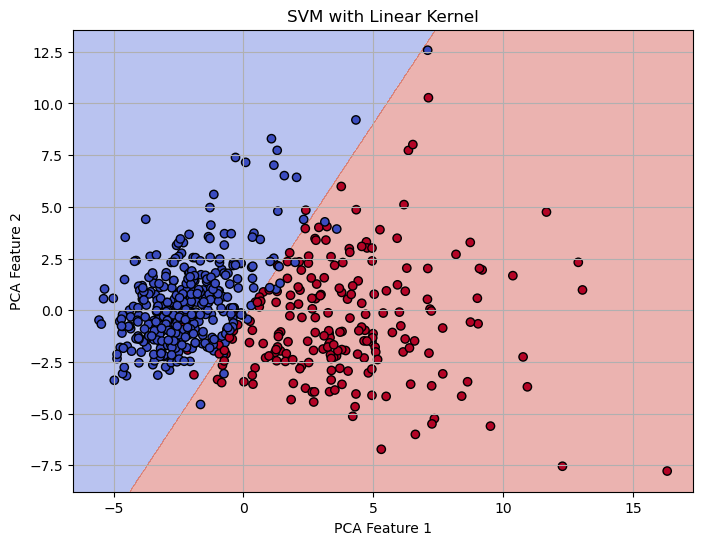

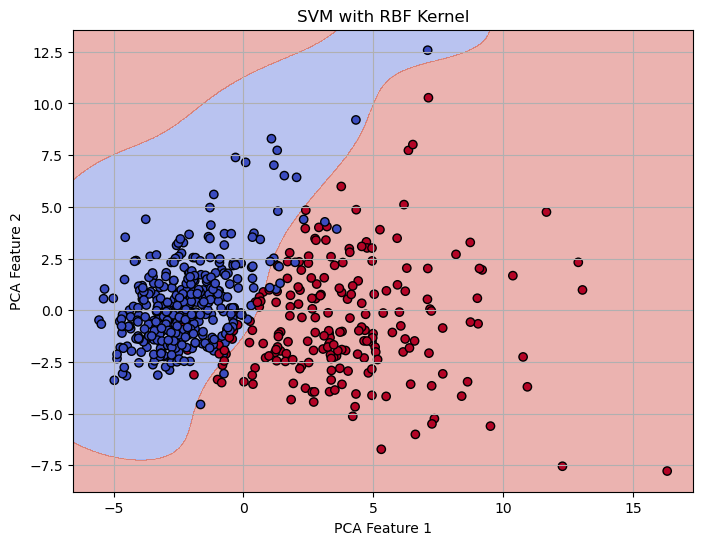

In [17]:
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, title):
    h = .02  # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("PCA Feature 1")
    plt.ylabel("PCA Feature 2")
    plt.grid()
    plt.show()

plot_decision_boundary(svc_linear, X_2D, y, "SVM with Linear Kernel")
plot_decision_boundary(svc_rbf, X_2D, y, "SVM with RBF Kernel")


In [18]:
from sklearn.model_selection import GridSearchCV

# Define grid for RBF kernel
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_2D, y)

print("Best Parameters (RBF SVM):", grid.best_params_)


Best Parameters (RBF SVM): {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [19]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores
cv_linear = cross_val_score(svc_linear, X_2D, y, cv=5).mean()
cv_rbf = cross_val_score(svc_rbf, X_2D, y, cv=5).mean()

print("Cross-validation Accuracy (Linear SVM):", cv_linear)
print("Cross-validation Accuracy (RBF SVM):", cv_rbf)


Cross-validation Accuracy (Linear SVM): 0.9525850023288308
Cross-validation Accuracy (RBF SVM): 0.9420276354603322
